## AMSC 661 - Scientific Computing II 
### Assignment 3, February 22, 2023
#### Dominic Flocco

In [60]:
import scipy as sc 
import numpy as np 
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import time, math


Consider the Prothero-Robinson problem $$ y' = -L(y-\phi(t)) + \phi'(t), \quad y(0) = y_0 $$ with $L = 10^4$ and $\phi(t) = \sin(t+\pi/4)$. The exact solution to this problem is $$ y = e^{Lt}(y_0 - \phi(0)) + \phi(t).$$

In [61]:
L = 1e4 
d = 5/24
p_array = np.arange(1, 6 + d, d)
tmax = 10

def phi(t):
    return np.sin(t + np.pi/4)

def phi_prime(t): 
    return np.cos(t + np.pi/4)

def f(t,y):
    return -L*(y - phi(t)) + phi_prime(t)


def DIRK2(f, y0, h, tMax):
    t = 0 
    gamma = 1 - 1/math.sqrt(2)
    iters = int(tMax/h)
    u = np.zeros(iters + 1)
    y = np.zeros(iters + 1)
   
    c = np.array([gamma, 1])
    b = np.array([1-gamma, gamma])
    A = np.array([[gamma, 0], [1-gamma, gamma]])
    u[0] = y0
    y[0] = y0

    for i in range(iters): 
        k1 = (1/(1+L*h*A[0,0]))*(-L*u[i] + L*phi(t+c[0]*h) + phi_prime(t+c[0]*h)) 
        k2 = (1/(1+L*h*A[1,1]))*(-L*u[i] - L*h*A[1,0]*k1 + L*phi(t+c[1]*h) + phi_prime(t+c[1]*h))
        u[i+1] = u[i] + h*(b[0]*k1 + b[1]*k2)
        t += h
        y[i+1] = np.exp(-L*t)*(y0 - phi(0)) + phi(t) 
        
    return u, y
def DIRK_order3(f, y0, h, tMax):
    t = 0
    iters = int(tMax/h)
    u = np.zeros(iters + 1)
    y = np.zeros(iters + 1)
    gamma = 1/2 + math.sqrt(3)/6
    c = np.array([gamma, 1- gamma])
    b = np.array([1/2, 1/2])
    A = np.array([[gamma, 0], [1-2*gamma, gamma]])
    u[0] = y0
    y[0] = y0

    for i in range(iters):
        k1 = (1/(1+L*h*A[0,0]))*(-L*u[i]+ L*phi(t+c[0]*h) + phi_prime(t+c[0]*h)) 
        k2 = (1/(1+L*h*A[1,1]))*(-L*u[i] - L*h*A[1,0]*k1 + L*phi(t+c[1]*h) + phi_prime(t+c[1]*h))
        u[i+1] = u[i] + h*(b[0]*k1 + b[1]*k2)
        t += h
        y[i+1] = np.exp(-L*t)*(y0 - phi(0)) + phi(t) 
    return u, y





In [62]:
DIRK2_results = {}
for p in p_array: 
    h = 10**(-p)
    y0 = np.sin(np.pi/4)
    gamma = 1 - 1/math.sqrt(2) # DIRK 2
    
    u, y = DIRK2(f, y0, h, 10)
    error = np.max(np.abs(u - y))
    DIRK2_results[p] = error

DIRK3_results = {}
for p in p_array: 
    h = 10**(-p)
    y0 = np.sin(np.pi/4)
    gamma = 1 - 1/math.sqrt(2) # DIRK 2
    
    u, y = DIRK_order3(f, y0, h, 10)
    error = np.max(np.abs(u - y))
    DIRK3_results[p] = error
    

Text(0.5, 1.0, 'Maximum error vs. timestep for DIRK methods, $y_0 = \\phi(0)$')

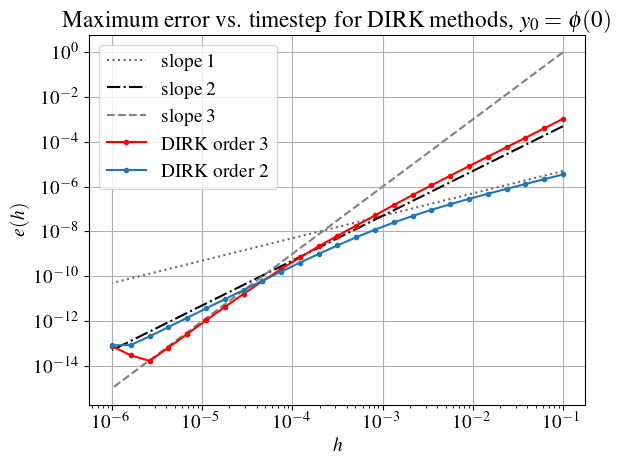

In [63]:
dt = np.array([10**(-p) for p in p_array])
plt.rcParams.update({
    "font.family": "Times",
    "text.usetex": True
})
plt.rcParams.update({'font.size': 14})
plt.plot(dt,5e-5*dt,label = 'slope 1', linestyle = 'dotted', color = 'dimgrey')
plt.plot(dt,5e-2*dt*dt,label = 'slope 2', linestyle = 'dashdot', color = 'black')
plt.plot(dt,1e3*dt*dt*dt,label = 'slope 3', linestyle = 'dashed', color = 'grey')
plt.plot(dt, np.array(np.array([DIRK3_results[p] for p in p_array])), label = 'DIRK order 3', marker='.', color='red')
plt.plot(dt, np.array(np.array([DIRK2_results[p] for p in p_array])), label = 'DIRK order 2', marker='.')
plt.xlabel('$h$')
plt.ylabel('$e(h)$')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.title('Maximum error vs. timestep for DIRK methods, $y_0 = \phi(0)$')

In [64]:
DIRK2_results_b = {}
for p in p_array: 
    h = 10**(-p)
    y0 = np.sin(np.pi/4) + 10
    
    u, y = DIRK2(f, y0, h, 10)
    error = np.max(np.abs(u - y))
    DIRK2_results_b[p] = error

DIRK3_results_b = {}
for p in p_array: 
    h = 10**(-p)
    y0 = np.sin(np.pi/4) + 10
    u, y = DIRK_order3(f, y0, h, 10)
    error = np.max(np.abs(u - y))
    DIRK3_results_b[p] = error



Text(0.5, 1.0, 'Maximum error vs. timestep for DIRK methods, $y_0 = \\phi(0)+10$')

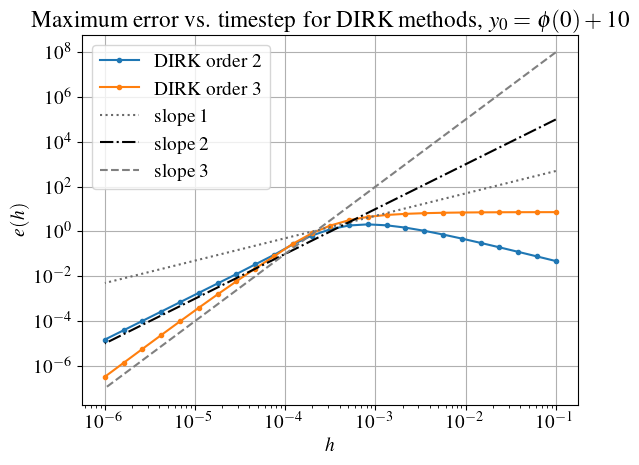

In [65]:
plt.rcParams.update({'font.size': 14})
dt = np.array([10**(-p) for p in p_array])
plt.plot(dt, np.array(np.array([DIRK2_results_b[p] for p in p_array])), label = 'DIRK order 2', marker='.')
plt.plot(dt, np.array(np.array([DIRK3_results_b[p] for p in p_array])), label = 'DIRK order 3', marker='.')
plt.plot(dt,5e3*dt,label = 'slope 1', linestyle = 'dotted', color = 'dimgrey')
plt.plot(dt,1e7*dt*dt,label = 'slope 2', linestyle = 'dashdot', color = 'black')
plt.plot(dt,1e11*dt*dt*dt,label = 'slope 3', linestyle = 'dashed', color = 'grey')
plt.xlabel('$h$')
plt.ylabel('$e(h)$')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.title('Maximum error vs. timestep for DIRK methods, $y_0 = \phi(0)+10$')

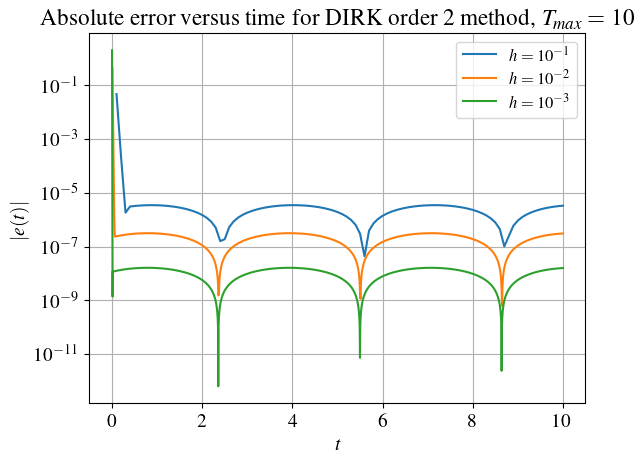

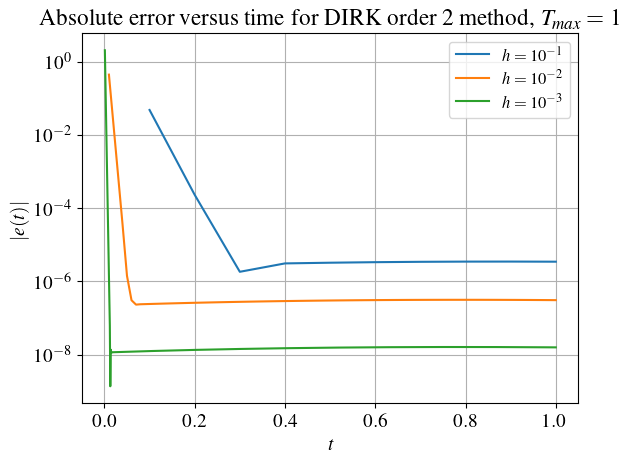

In [66]:
p_array_b = [-1, -2, -3]
d2_error_list_a = {}
d2_error_list_b = {}
for p in p_array_b: 
    h = 10**(p)
    y0 = np.sin(np.pi/4) + 10
    u, y = DIRK2(f, y0, h, 10)
    error_list_D2 = np.abs(u - y)
    d2_error_list_a[p] = error_list_D2
    u, y = DIRK2(f, y0, h, 1)
    error_list_D2 = np.abs(u - y)
    d2_error_list_b[p] = error_list_D2

plt.rcParams.update({
    "font.family": "Times",
    "font.size": 14,
    "text.usetex": True
})
x = np.arange(1e-1,10 + 1e-1, 1e-1)
plt.plot(x, d2_error_list_a[-1][1:], label='$h=10^{-1}$')
x = np.arange(1e-2,10 + 1e-2, 1e-2)
plt.plot(x, d2_error_list_a[-2][1:], label='$h=10^{-2}$')
x = np.arange(1e-3,10 + 1e-3, 1e-3)
plt.plot(x, d2_error_list_a[-3][1:], label='$h=10^{-3}$')
plt.legend(fontsize=12)
plt.yscale('log')
plt.grid()
plt.ylabel('$|e(t)|$')
plt.xlabel('$t$')
plt.title('Absolute error versus time for DIRK order 2 method, $T_{max} = 10$')
plt.show()
x = np.arange(1e-1,1+ 1e-1, 1e-1)
plt.plot(x, d2_error_list_b[-1][1:], label='$h=10^{-1}$')
x = np.arange(1e-2,1 + 1e-2, 1e-2)
plt.plot(x, d2_error_list_b[-2][1:], label='$h=10^{-2}$')
x = np.arange(1e-3,1 + 1e-3, 1e-3)
plt.plot(x, d2_error_list_b[-3][1:], label='$h=10^{-3}$')
plt.legend(fontsize=12)
plt.yscale('log')
plt.grid()
plt.ylabel('$|e(t)|$')
plt.xlabel('$t$')
plt.title('Absolute error versus time for DIRK order 2 method, $T_{max} = 1$')
plt.show()

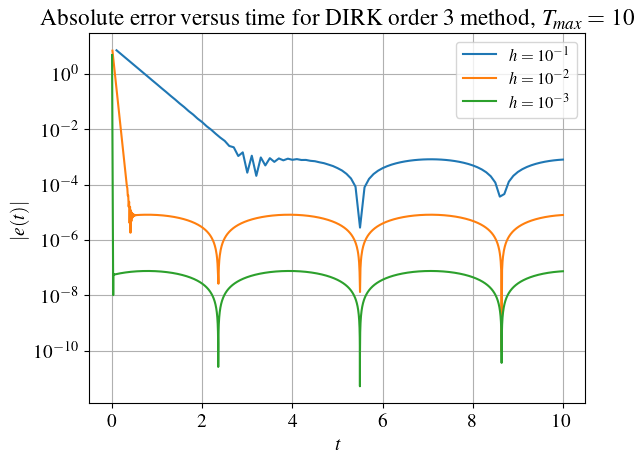

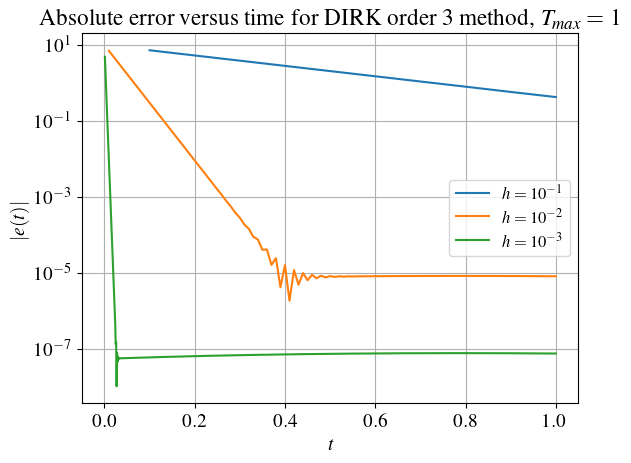

In [67]:
p_array_b = [-1, -2, -3]
d3_error_list_a = {}
d3_error_list_b = {}
for p in p_array_b: 
    h = 10**(p)
    y0 = np.sin(np.pi/4) + 10
    u, y = DIRK_order3(f, y0, h, 10)
    error_list = np.abs(u - y)
    d3_error_list_a[p] = error_list
    u, y = DIRK_order3(f, y0, h, 1)
    error_list = np.abs(u - y)
    d3_error_list_b[p] = error_list

plt.rcParams.update({
    "font.family": "Times",
    "font.size": 14,
    "text.usetex": True
})
x = np.arange(1e-1,10 + 1e-1, 1e-1)
plt.plot(x, d3_error_list_a[-1][1:], label='$h=10^{-1}$')
x = np.arange(1e-2,10 + 1e-2, 1e-2)
plt.plot(x, d3_error_list_a[-2][1:], label='$h=10^{-2}$')
x = np.arange(1e-3,10 + 1e-3, 1e-3)
plt.plot(x, d3_error_list_a[-3][1:], label='$h=10^{-3}$')
plt.legend(fontsize=12)
plt.yscale('log')
plt.grid()
plt.ylabel('$|e(t)|$')
plt.xlabel('$t$')
plt.title('Absolute error versus time for DIRK order 3 method, $T_{max} = 10$')
plt.show()
x = np.arange(1e-1,1+ 1e-1, 1e-1)
plt.plot(x, d3_error_list_b[-1][1:], label='$h=10^{-1}$')
x = np.arange(1e-2,1 + 1e-2, 1e-2)
plt.plot(x, d3_error_list_b[-2][1:], label='$h=10^{-2}$')
x = np.arange(1e-3,1 + 1e-3, 1e-3)
plt.plot(x, d3_error_list_b[-3][1:], label='$h=10^{-3}$')
plt.legend(fontsize=12)
plt.yscale('log')
plt.grid()
plt.ylabel('$|e(t)|$')
plt.xlabel('$t$')
plt.title('Absolute error versus time for DIRK order 3 method, $T_{max} = 1$')
plt.show()